In [95]:
import torch
from labproject.data import get_dataset, DATASETS
from labproject.metrics import METRICS

from labproject.metrics.utils import get_metric

import matplotlib.pyplot as plt

In [52]:
DATASETS

{'random': <function labproject.data.random_dataset(n=1000, d=10)>,
 'multivariate_normal': <function labproject.data.multivariate_normal(n=3000, dims=100, means=None, vars=None, distort=None)>,
 'toy_2d': <function labproject.data.toy_2d(n=1000, d=2)>,
 'cifar10_train': <function labproject.data.cifar10_train(n=1000, d=2048, save_path='data', device='cpu', return_labels=False)>,
 'cifar10_test': <function labproject.data.cifar10_test(n=1000, d=2048, save_path='data', device='cpu', return_labels=False)>,
 'imagenet_real_embeddings': <function labproject.data.imagenet_real_embeddings(n=1000, d=2048)>,
 'imagenet_uncond_embeddings': <function labproject.data.imagenet_uncond_embeddings(n=1000, d=2048)>,
 'imagenet_unconditional_model_embedding': <function labproject.data.imagenet_unconditional_model_embedding(n, d=2048, device='cpu', save_path='data')>,
 'imagenet_test_embedding': <function labproject.data.imagenet_test_embedding(n, d=2048, device='cpu', save_path='data')>,
 'imagenet_val

In [96]:
METRICS

{'mmd_rbf': <function labproject.metrics.MMD_torch.compute_rbf_mmd(x, y, bandwidth=1.0)>,
 'mmd_rbf_median_heuristic': <function labproject.metrics.MMD_torch.compute_rbf_mmd_median_heuristic(x, y)>,
 'mmd_rbf_auto': <function labproject.metrics.MMD_torch.compute_rbf_mmd_auto(x, y, bandwidth=1.0)>,
 'mmd_polynomial': <function labproject.metrics.MMD_torch.compute_polynomial_mmd(x, y, degree=2, bias=0)>,
 'mmd_linear_naive': <function labproject.metrics.MMD_torch.compute_linear_mmd_naive(x, y)>,
 'mmd_linear': <function labproject.metrics.MMD_torch.compute_linear_mmd(x, y)>,
 'c2st_nn': <function labproject.metrics.c2st.c2st_nn(X: torch.Tensor, Y: torch.Tensor, seed: int = 1, n_folds: int = 5, metric: str = 'accuracy', z_score: bool = True, activation: Literal['identity', 'logistic', 'tanh', 'relu'] = 'relu', clf_kwargs: dict[str, typing.Any] = {}) -> torch.Tensor>,
 'c2st_rf': <function labproject.metrics.c2st.c2st_rf(X: torch.Tensor, Y: torch.Tensor, seed: int = 1, n_folds: int = 5, me

In [91]:
metric_fn = get_metric("wasserstein_gauss_squared")
metric_fn2 = get_metric("sliced_wasserstein")

In [92]:
datasets = ["imagenet_unconditional_model_embedding","imagenet_cs1_embedding", "imagenet_cs10_embedding", "imagenet_biggan_embedding", "imagenet_sdv4_embedding", "imagenet_sdv5_embedding", "imagenet_vqdm_embedding", "imagenet_wukong_embedding", "imagenet_adm_embedding", "imagenet_midjourney_embedding"]

In [93]:
testset_fn = get_dataset("imagenet_test_embedding")

In [94]:
testset = testset_fn(100_000, 2048)
idx = torch.randperm(len(testset))
testset = testset[idx]

In [ ]:
results = {}

In [89]:
for dname in datasets:
    data = get_dataset(dname)(20_000, 2048, permute=True)
    

(array([190., 351., 418., 528., 509., 581., 534., 547., 529., 488., 459.,
        437., 401., 343., 318., 306., 272., 235., 217., 221., 175., 176.,
        158., 124., 151., 121., 105.,  91.,  92.,  76.,  66.,  77.,  72.,
         60.,  42.,  38.,  42.,  37.,  42.,  32.,  23.,  21.,  29.,  26.,
         23.,  22.,  25.,  18.,  17.,  11.,  10.,  13.,  17.,  11.,   4.,
          8.,   6.,   3.,   5.,   6.,   1.,   3.,   4.,   2.,   1.,   3.,
          3.,   1.,   1.,   3.,   0.,   1.,   2.,   5.,   1.,   1.,   0.,
          0.,   2.,   0.,   3.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([0.        , 0.0224842 , 0.0449684 , 0.0674526 , 0.0899368 ,
        0.112421  , 0.1349052 , 0.1573894 , 0.1798736 , 0.2023578 ,
        0.224842  , 0.2473262 , 0.26981041, 0.29229459, 0.3147788 ,
        0.33726299, 0.3597472 , 0.38223141, 0.4047156 , 0.42719981,
        0.44968399, 0.47216821, 0.49465239, 0.

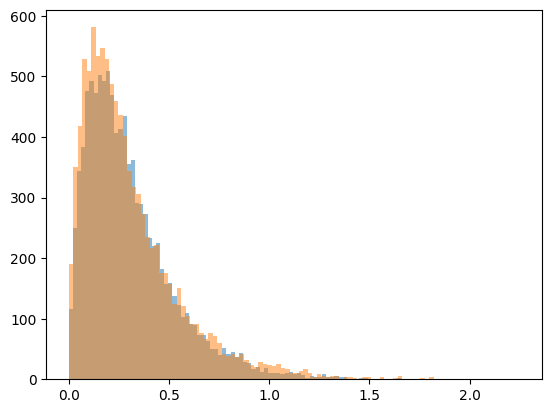

In [83]:
plt.hist(data[:, 0].numpy(), bins=100, alpha=0.5, label="data")
plt.hist(testset[:10_000, 0].numpy(), bins=100, alpha=0.5, label="testset")

In [90]:
metric_fn(testset[:20_000], data)

tensor(6.3563)

In [88]:
metric_fn2(testset[:data.shape[0]], data, num_projections=5000)

tensor(0.0216)